In [ ]:
import string

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
print (tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
mnist=keras.datasets.fashion_mnist

In [ ]:
type(mnist)

module

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
np.max(x_train)

255

In [ ]:
np.mean(x_train)

72.94035223214286

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names1=['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [ ]:
####Data Exploration

In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

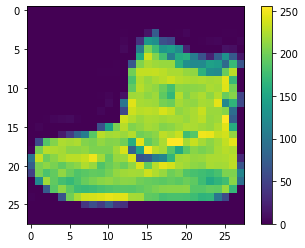

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
x_train=x_train/255.0

In [ ]:
x_test=x_test/255.0

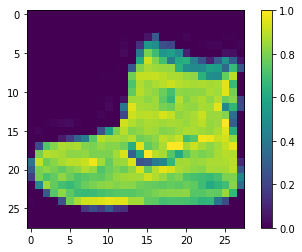

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [ ]:
#Building the model TF.2.0

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))

model.add(Dense(10,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#loss Funation
#optimization
#metrics

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6166 - accuracy: 0.7864
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3855 - accuracy: 0.8612
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3330 - accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3077 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2930 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2818 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2674 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(test_acc)
print(test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8846
0.8845999836921692
0.3219989836215973


In [ ]:
from sklearn.metrics import  accuracy_score

In [ ]:
y_pred=model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
accuracy_score(y_test,y_pred)

0.8846

In [ ]:
pred=model.predict(x_test)

In [ ]:
pred

array([[8.0008154e-05, 3.5784674e-06, 1.9583081e-06, ..., 4.7838497e-01,
        1.7264587e-05, 9.9661696e-01],
       [6.0692114e-01, 6.1625949e-09, 9.9991214e-01, ..., 6.4838803e-13,
        3.1229320e-07, 9.1829264e-08],
       [5.6361914e-02, 1.0000000e+00, 3.9753318e-04, ..., 5.0805727e-14,
        1.1959680e-06, 3.4958103e-09],
       ...,
       [2.3721129e-02, 9.4406914e-08, 8.9129806e-04, ..., 4.6992736e-06,
        9.9430239e-01, 4.9773149e-08],
       [6.6193938e-04, 9.9999714e-01, 3.4335256e-04, ..., 8.9400438e-11,
        3.6698832e-05, 7.6531691e-08],
       [1.0346770e-03, 3.1596537e-07, 1.0555498e-04, ..., 2.1633974e-01,
        1.2072146e-02, 3.6486983e-04]], dtype=float32)

In [ ]:
pred[0]

array([8.0008154e-05, 3.5784674e-06, 1.9583081e-06, 1.5990730e-06,
       8.5161701e-06, 1.3264522e-01, 5.3162395e-05, 4.7838497e-01,
       1.7264587e-05, 9.9661696e-01], dtype=float32)

In [ ]:
np.argmax(pred[1])

2

In [ ]:
np.argmax(pred[0])

9

Plot Learning Curves and Confusion Matrix

In [ ]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evaluation method (since it isn't yet buil

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics  import confusion_matrix
import matplotlib

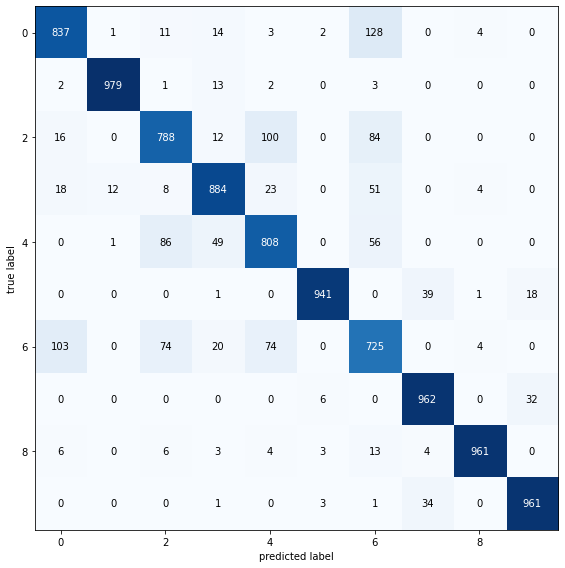

In [ ]:
mat=confusion_matrix(y_test,y_pred)
fig,ax=plot_confusion_matrix(conf_mat=mat,figsize=(8,8), show_normed=Fals,labe)
plt.tight_layout()